# 0. Overview
Author: Darrin O'Brien, darrinobrien5@gmail.com
1. Loads Results from testing of entire dataset.
2. Graphs them

## 1. Imports

In [20]:
import pandas as pd
import matplotlib.pyplot as plt 
import os

## 2. Results Preparation

In [2]:
results = [] # File Loading

path = '/Users/darrinobrien/Desktop/Algoverse Important Files/CLIP-MNIST/Entire/Results/Entire_Transformation_Matrix_W'

try:
    for filename in os.listdir(path):
        file_path = os.path.join(path, filename)
        if os.path.isfile(file_path):
            results.append(file_path)
except FileNotFoundError:
    print(f"Error: The Folder '{path}' was not found.")
except Exception as e:
    print(f"An error occured: {e}")

In [3]:
len(results) # Should be 22. Sanity Check

22

In [8]:
data = [pd.read_csv(i) for i in results]
data = sorted(data, key=lambda df: df.loc[0, "Train_Data_Size"])

# Columns
'''
data = {
    'Train_Data_Size': [train_size]*len(indices),
    "Transformation": [type if type != "" else "None"] * len(indices),
    'W': [W[i] for i in indices], # data.loc[0, "W"] -> First layer transformation
    'b': [b[i] for i in indices],
    'Accuracy': [correct[i] for i in indices], 
    "Co_Sim_CLS": [sim_cls[i] for i in indices],
}
'''

'\ndata = {\n    \'Train_Data_Size\': [train_size]*len(indices),\n    "Transformation": [type if type != "" else "None"] * len(indices),\n    \'W\': [W[i] for i in indices], # data.loc[0, "W"] -> First layer transformation\n    \'b\': [b[i] for i in indices],\n    \'Accuracy\': [correct[i] for i in indices], \n    "Co_Sim_CLS": [sim_cls[i] for i in indices],\n}\n'

In [14]:
data[0].loc[2, "Co_Sim_CLS"]

0.2687046135876589

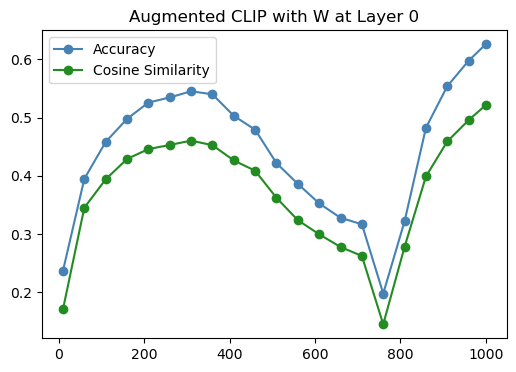

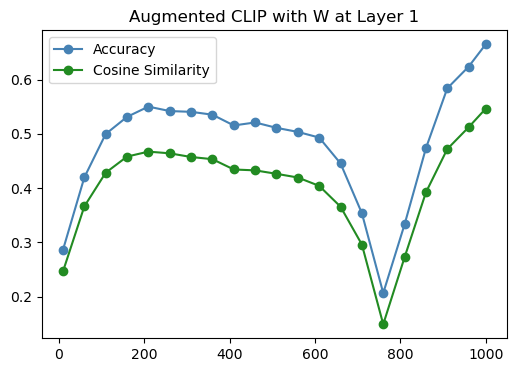

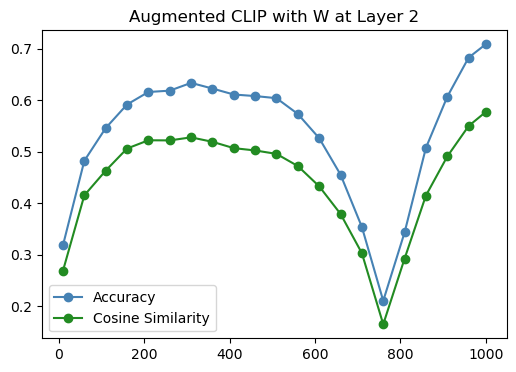

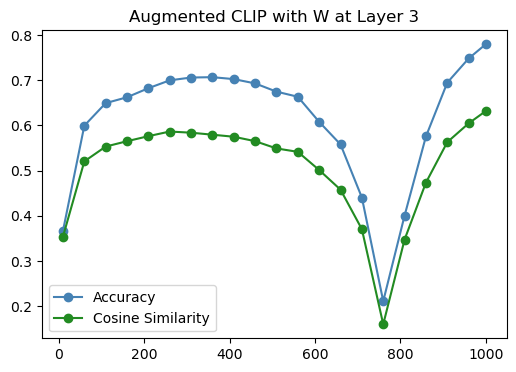

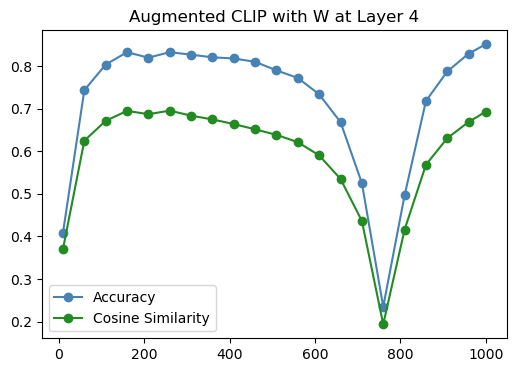

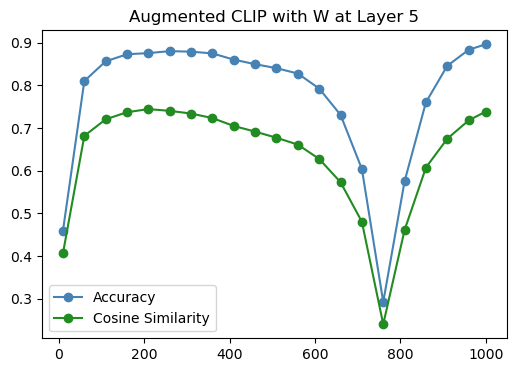

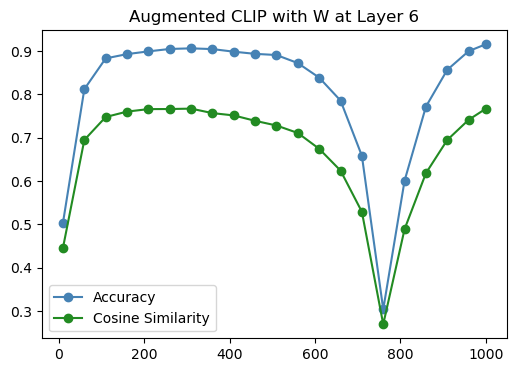

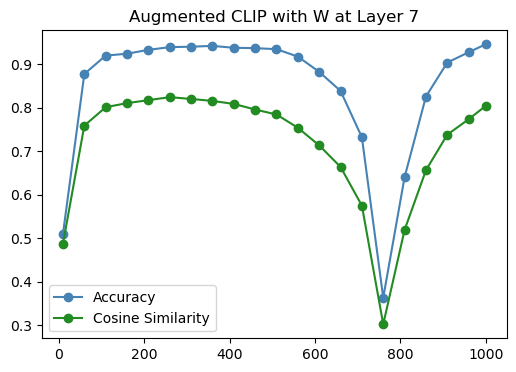

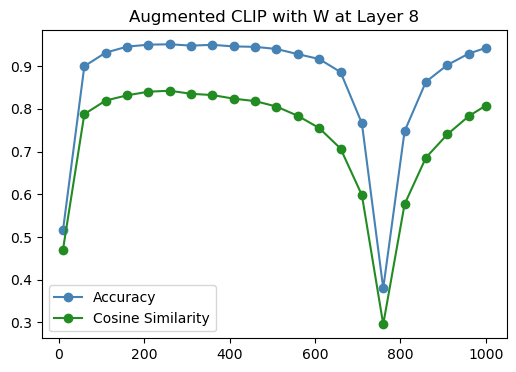

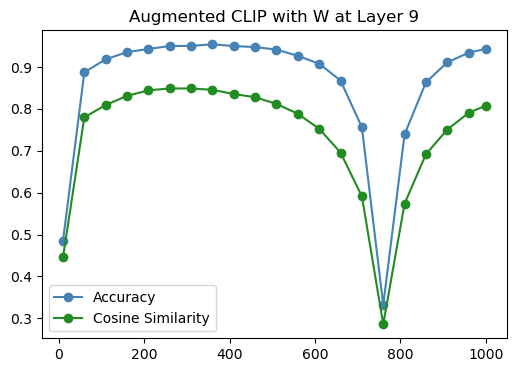

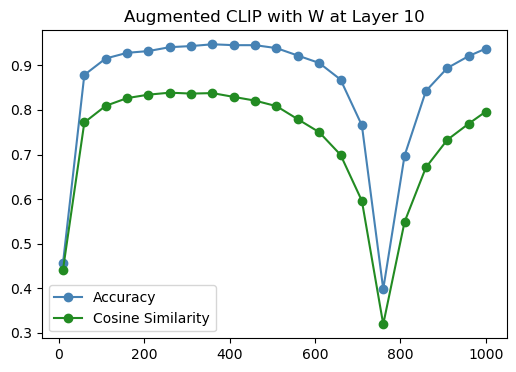

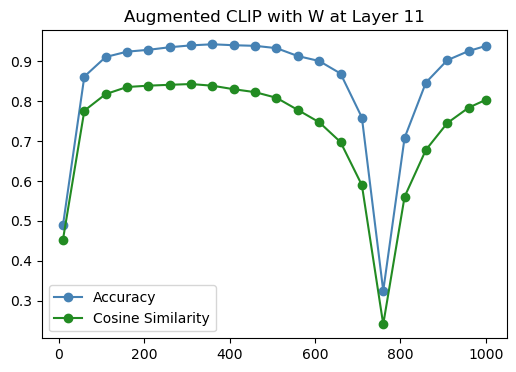

In [58]:
# 14 Models / Transformation Layer Augmentations
# 2 Metrics: Classification Accuracy + Cosine Similarity
# 22 Files. Each one = Different Training Size. 12 * 2 = 24 plots, with 22 data points each.

nrows = 2
ncols = 12

# figure, axes = plt.subplots(nrows, ncols)
for i in range(12): # For Each Layer
    plt.figure(figsize=(6,4))
    train_size = []
    acc = []
    co_sim_cls = []
    for j in range(21): # For Each File
        train_size.append(data[j].loc[i, "Train_Data_Size"])
        acc.append(data[j].loc[i, "Accuracy"])
        co_sim_cls.append(data[j].loc[i, "Co_Sim_CLS"])
    
    plt.plot(train_size, acc, marker='o', color='steelblue', label="Accuracy")
    plt.plot(train_size, co_sim_cls, marker='o', color="forestgreen", label="Cosine Similarity")
    plt.legend()
    plt.title(f"Augmented CLIP with W at Layer {i}")
    plt.savefig(f'/Users/darrinobrien/Desktop/Algoverse Important Files/CLIP-MNIST/Entire/GraphedResults/Augmented_Layer_{i}', dpi=600)
    plt.show()